<a href="https://colab.research.google.com/github/shallabhkhera/NPTEL-Data-Analytics-with-Python/blob/main/Week7_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import statsmodels.api as s
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [18]:
df1 = pd.read_excel('https://github.com/shallabhkhera/NPTEL-Data-Analytics-with-Python/blob/main/TRUCKING.xlsx?raw=true')
df1

,Driving Assignmnet,x1,n_of_deliveries,travel_time
0,1,100,4,9.3
1,2,50,3,4.8
2,3,100,4,8.9
3,4,100,2,6.5
4,5,50,2,4.2
5,6,80,2,6.2
6,7,75,3,7.4
7,8,65,4,6.0
8,9,90,3,7.6
9,10,90,2,6.1


Text(0.5, 1.0, 'Simple linear regression')

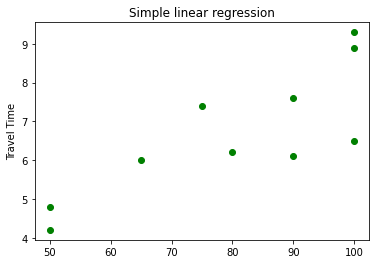

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df1['x1'], df1['travel_time'], color="green")
plt.ylabel("Travel Time")
plt.title("Simple linear regression")

Text(0.5, 1.0, 'Simple linear regression')

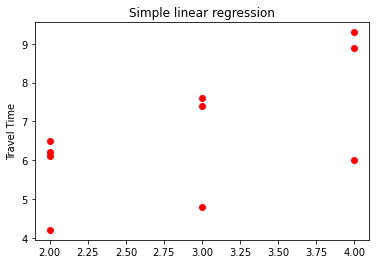

In [20]:
plt.scatter(df1['n_of_deliveries'], df1['travel_time'], color="red")
plt.ylabel("Travel Time")
plt.title("Simple linear regression")

Text(0.5, 0, 'x1 in green and x2 in red')

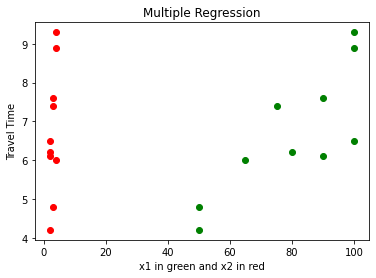

In [21]:
plt.figure()
plt.scatter(df1['x1'], df1['travel_time'], color="green")
plt.scatter(df1['n_of_deliveries'], df1['travel_time'], color="red")
plt.ylabel("Travel Time")
plt.title("Multiple Regression")
plt.xlabel("x1 in green and x2 in red")

In [22]:
Reg1 = ols(formula = "travel_time ~ x1", data = df1)
Fit1 = Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:            travel_time   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     15.81
Date:                Sat, 21 Aug 2021   Prob (F-statistic):            0.00408
Time:                        06:09:50   Log-Likelihood:                -13.092
No. Observations:                  10   AIC:                             30.18
Df Residuals:                       8   BIC:                             30.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2739      1.401      0.909      0.3

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [23]:
model = ols(formula = "travel_time ~ x1+n_of_deliveries", data = df1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            travel_time   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.88
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           0.000276
Time:                        06:09:50   Log-Likelihood:                -6.8398
No. Observations:                  10   AIC:                             19.68
Df Residuals:                       7   BIC:                             20.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8687      0.952     

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [24]:
print(anova_lm(Fit1))

           df     sum_sq    mean_sq          F   PR(>F)
x1        1.0  15.871304  15.871304  15.814578  0.00408
Residual  8.0   8.028696   1.003587        NaN      NaN


In [25]:
print(anova_lm(model, typ=1))

                  df     sum_sq    mean_sq          F    PR(>F)
x1               1.0  15.871304  15.871304  48.315660  0.000221
n_of_deliveries  1.0   5.729252   5.729252  17.441075  0.004157
Residual         7.0   2.299443   0.328492        NaN       NaN


In [26]:
df2 = pd.read_excel('https://github.com/shallabhkhera/NPTEL-Data-Analytics-with-Python/blob/main/dummy.xlsx?raw=true')
df2

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


In [27]:
#Reg = ols(formula="repair_time_in_hours ~ months_since_last_service")
just_dummies2 = pd.get_dummies(df2['type_of_repair'])
just_dummies2

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [29]:
step1 = pd.concat([df2, just_dummies2], axis=1)
step1.drop(['type_of_repair', 'mechanical'], inplace=True, axis=1)
step1


,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


In [36]:
result = ols(formula = "repair_time_in_hours ~ months_since_last_service+electrical", data = step1).fit()
print(result.summary())
#result = ols(step1['repair_time_in_hours'], s.add_constant(step1[['months_since_last_service', 'electrical' ]])).fit()

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Sat, 21 Aug 2021   Prob (F-statistic):            0.00105
Time:                          08:35:16   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
